In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size']  = 14

In [3]:
row_names      = ['matbench_perovskites','LiIon_roomtemp']
model_names    = ['Roost', 
                    'Roost+MatBert(sum)', 
                    'Roost+MatBert(concat)', 
                    'Roost+MatSciBert(sum)',
                    'Roost+MatSciBert(concat)']

# header = pd.MultiIndex.from_product([row_names, model_names], names=['Datasets', 'metric'])
table  = pd.DataFrame(index=row_names, columns=model_names)

In [4]:
#Perovskites
perovskites = pd.read_csv('results/perovskites.csv')
liion       = pd.read_csv('results/liion.csv')
exp_names   = perovskites['Name'].tolist() + liion['Name'].tolist()

all_results = pd.concat([perovskites,liion])

metrics     = ['test_mae_epoch','test_r2_epoch']

In [5]:
dict_results = {
    'matbench_perovskites':{
        'Roost':[],
        'Roost+MatBert(sum)':[],
        'Roost+MatBert(concat)':[],
        'Roost+MatSciBert(sum)':[],
        'Roost+MatSciBert(concat)':[]
    },

    'LiIon_roomtemp':{
        'Roost':[],
        'Roost+MatBert(sum)':[],
        'Roost+MatBert(concat)':[],
        'Roost+MatSciBert(sum)':[],
        'Roost+MatSciBert(concat)':[]
    }
}
for dataset in row_names:
    for model in model_names:
        maes = []
        for n in range(3): #3 random seeds
            if model == 'Roost':
                maes.append(all_results[all_results['Name']==f'{dataset}-none-none-id-{n}']['test_mae_epoch'].values[0])
            elif model == 'Roost+MatBert(sum)':
                maes.append(all_results[all_results['Name']==f'{dataset}-matbert-sum-id-{n}']['test_mae_epoch'].values[0])
            elif model == 'Roost+MatBert(concat)':
                maes.append(all_results[all_results['Name']==f'{dataset}-matbert-concat-id-{n}']['test_mae_epoch'].values[0])
            elif model == 'Roost+MatSciBert(sum)':
                maes.append(all_results[all_results['Name']==f'{dataset}-matscibert-sum-id-{n}']['test_mae_epoch'].values[0])
            elif model == 'Roost+MatSciBert(concat)':
                maes.append(all_results[all_results['Name']==f'{dataset}-matscibert-concat-id-{n}']['test_mae_epoch'].values[0])
        
        dict_results[dataset][model] = maes
        table.loc[f'{dataset}',f'{model}'] = f'{np.mean(maes):.3f} ± {np.std(maes):.3f}'

In [6]:
table

,Roost,Roost+MatBert(sum),Roost+MatBert(concat),Roost+MatSciBert(sum),Roost+MatSciBert(concat)
matbench_perovskites,0.101 ± 0.001,0.097 ± 0.002,0.097 ± 0.002,0.098 ± 0.002,0.098 ± 0.001
LiIon_roomtemp,1.493 ± 0.115,1.049 ± 0.163,1.092 ± 0.063,0.933 ± 0.053,1.108 ± 0.155


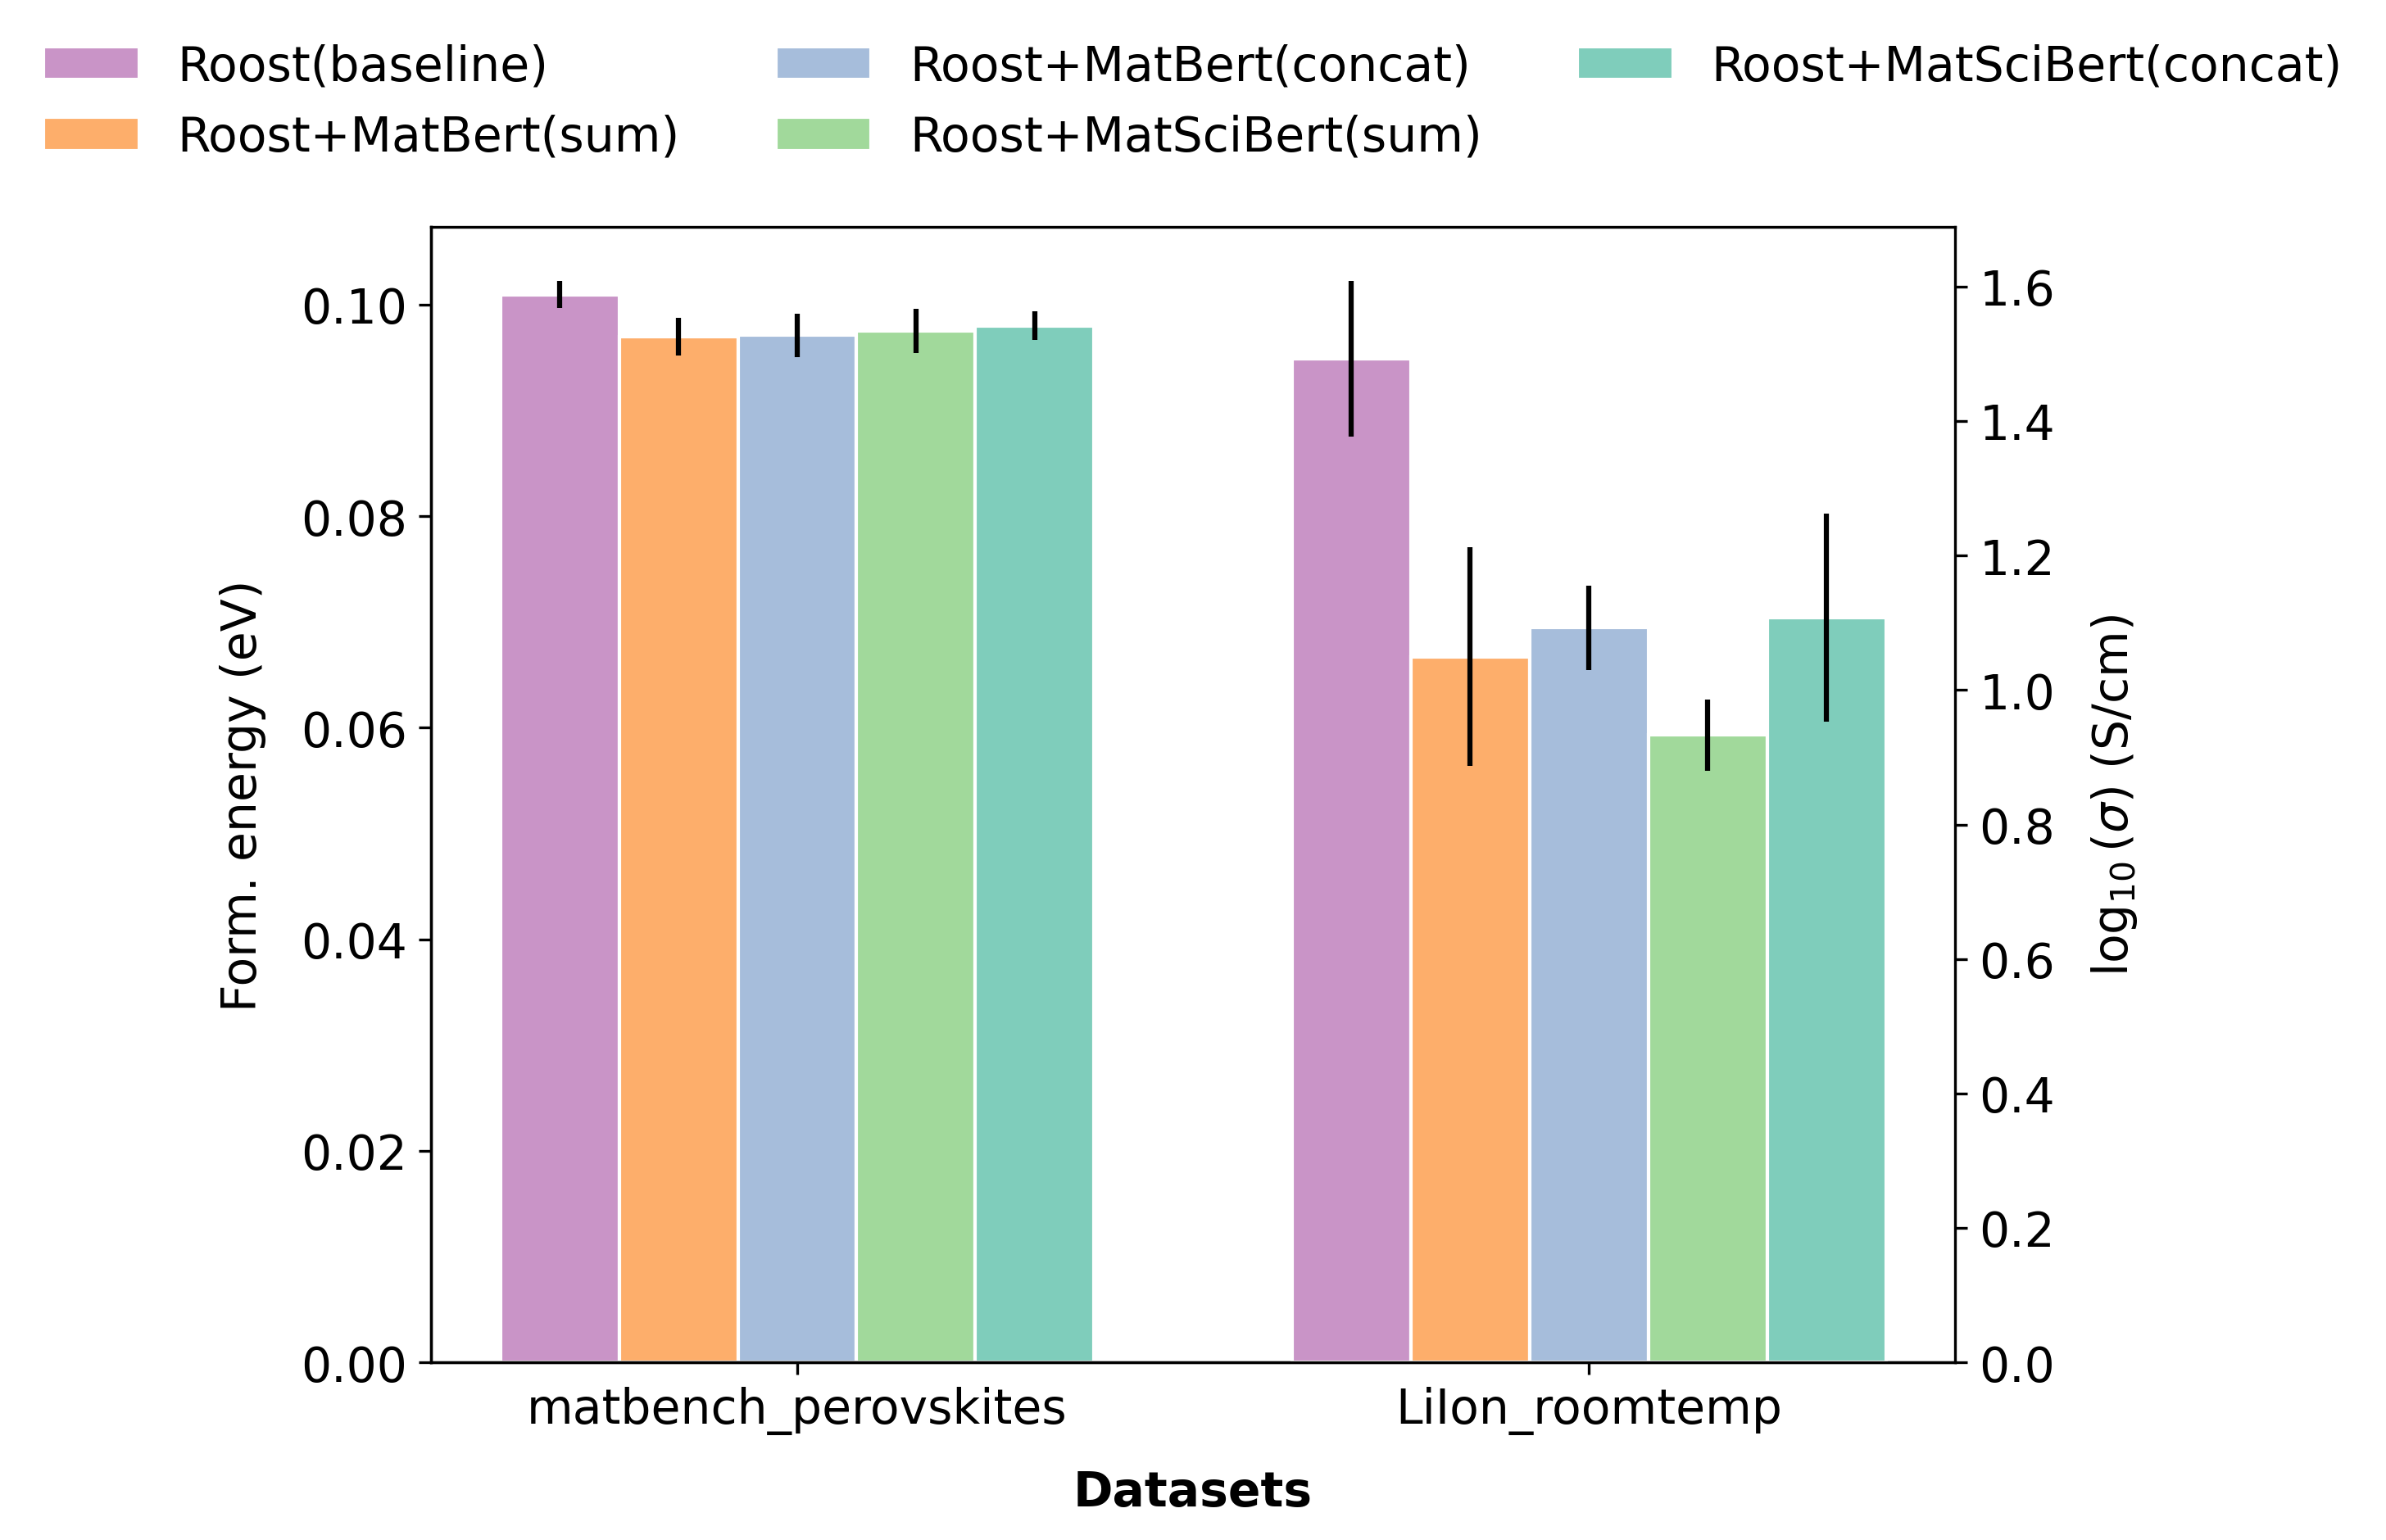

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 14

# set width of bars
barWidth = 0.15

# set heights of bars
bars1 = [np.mean(dict_results['matbench_perovskites']['Roost']), np.mean(dict_results['LiIon_roomtemp']['Roost'])]
unc1  = [np.std(dict_results['matbench_perovskites']['Roost']), np.std(dict_results['LiIon_roomtemp']['Roost'])]

bars2 = [np.mean(dict_results['matbench_perovskites']['Roost+MatBert(sum)']), np.mean(dict_results['LiIon_roomtemp']['Roost+MatBert(sum)'])]
unc2  = [np.std(dict_results['matbench_perovskites']['Roost+MatBert(sum)']), np.std(dict_results['LiIon_roomtemp']['Roost+MatBert(sum)'])]

bars3 = [np.mean(dict_results['matbench_perovskites']['Roost+MatBert(concat)']), np.mean(dict_results['LiIon_roomtemp']['Roost+MatBert(concat)'])]
unc3  = [np.std(dict_results['matbench_perovskites']['Roost+MatBert(concat)']), np.std(dict_results['LiIon_roomtemp']['Roost+MatBert(concat)'])]

bars4 = [np.mean(dict_results['matbench_perovskites']['Roost+MatSciBert(sum)']), np.mean(dict_results['LiIon_roomtemp']['Roost+MatSciBert(sum)'])]
unc4  = [np.std(dict_results['matbench_perovskites']['Roost+MatSciBert(sum)']), np.std(dict_results['LiIon_roomtemp']['Roost+MatSciBert(sum)'])]

bars5 = [np.mean(dict_results['matbench_perovskites']['Roost+MatSciBert(concat)']), np.mean(dict_results['LiIon_roomtemp']['Roost+MatSciBert(concat)'])]
unc5  = [np.std(dict_results['matbench_perovskites']['Roost+MatSciBert(concat)']), np.std(dict_results['LiIon_roomtemp']['Roost+MatSciBert(concat)'])]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
# Make the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax2 = ax.twinx()
ax2.set_ylabel('$\log_{10}(\sigma)$ (S/cm)', labelpad=10)

used_labels = []
labels = ['Roost(baseline)', 'Roost+MatBert(sum)', 'Roost+MatBert(concat)', 'Roost+MatSciBert(sum)', 'Roost+MatSciBert(concat)']
colors = ['#c994c7','#fdae6b','#a6bddb','#a1d99b','#7fcdbb']
for r, bar, unc, color,label in zip([r1, r2, r3, r4, r5],
                                    [bars1, bars2, bars3, bars4, bars5],
                                    [unc1, unc2, unc3, unc4, unc5],
                                    colors,
                                    labels):
    kwargs = {'color': color, 
              'width': barWidth,
              'edgecolor': 'white'}
    
    ax.bar(r[0], bar[0], yerr=unc[0], label=label, **kwargs)
    ax2.bar(r[1], bar[1], yerr=unc[1], **kwargs)
    # ax.errorbar(r[0],bar[0],yerr=unc[0], color='black')
    # ax2.errorbar(r[1],bar[1],yerr=bar[1], color='black')

# Add xticks on the middle of the group bars
group_labels = ['matbench_perovskites', 'LiIon_roomtemp']  # Category labels
ax.set_xlabel('Datasets', fontweight='bold', labelpad=10)
ax.set_ylabel('Form. energy (eV)', labelpad=10,)
ax.set_xticks([r + 2 * barWidth for r in range(len(bars1))])
ax.set_xticklabels(group_labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(0.5, 1.2), ncol=3)

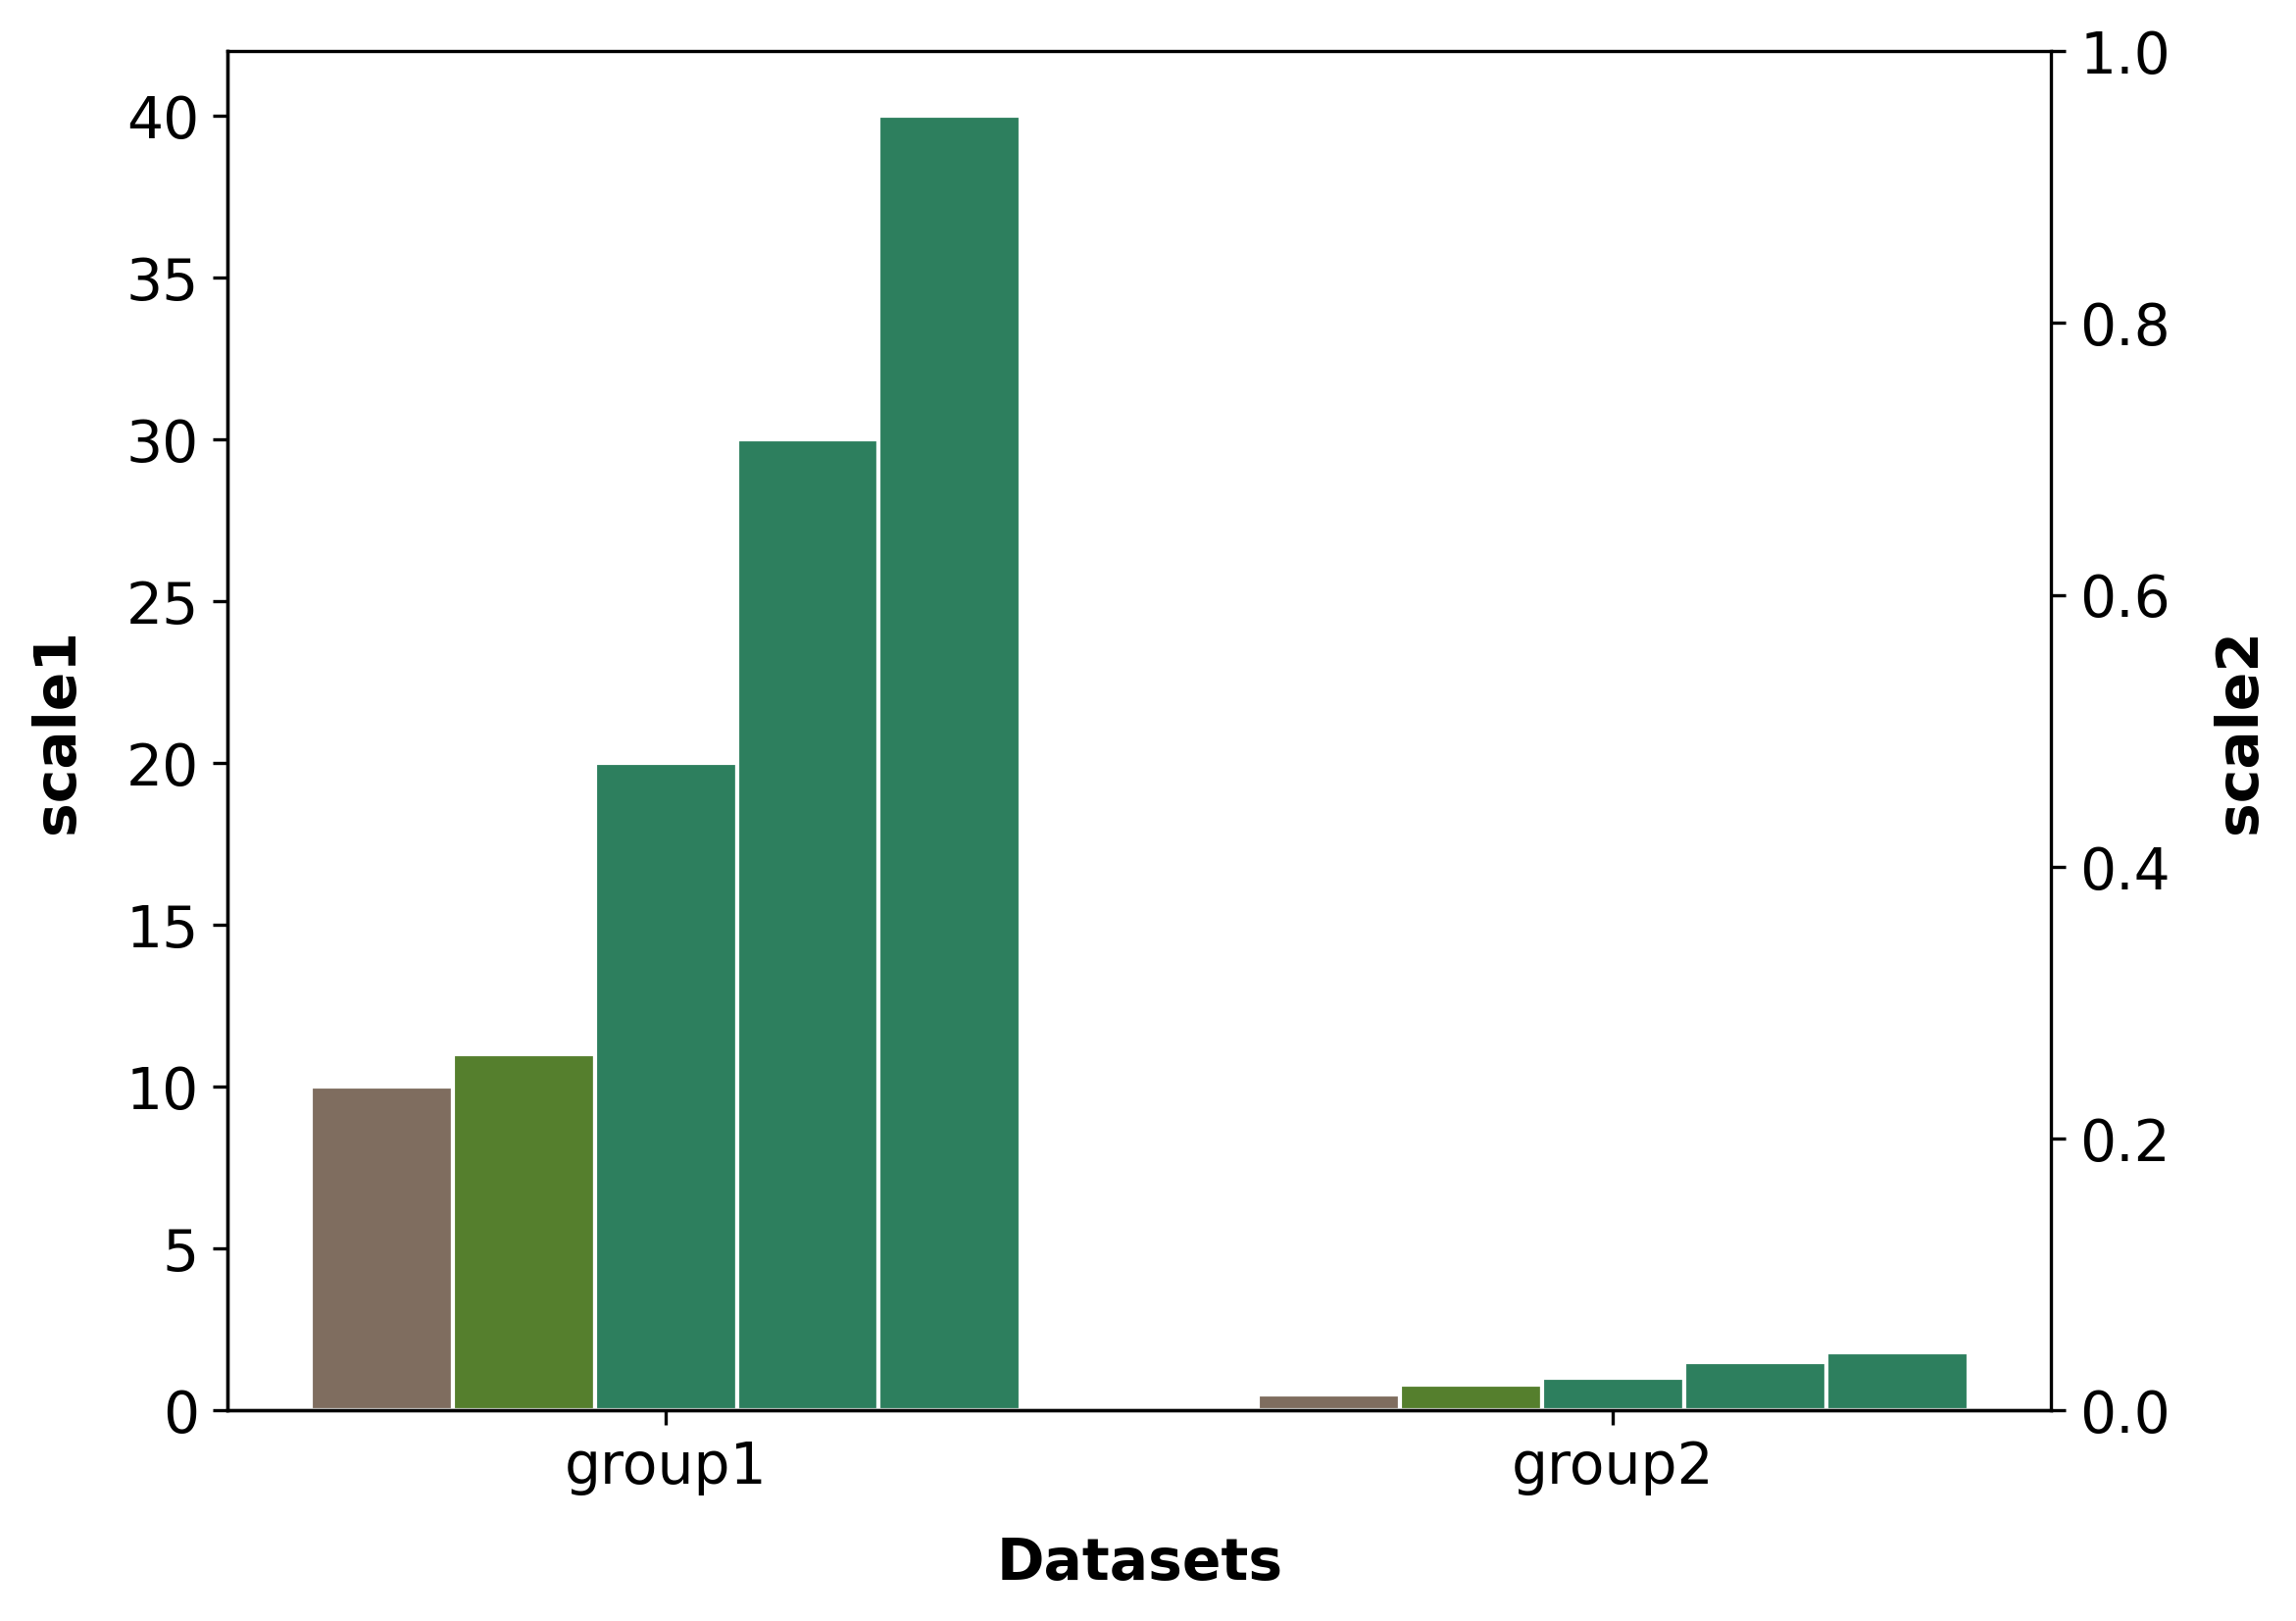

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 14

# set width of bars
barWidth = 0.15

bars1   = [10, 0.5]
bars2   = [11, 0.8]
bars3   = [20, 1.0]
bars4   = [30, 1.5]
bars5   = [40, 1.8]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white') #label='Roost')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white') #label='Roost+MatBert(sum)')
ax.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white')# label='Roost+MatBert(concat)')
ax.bar(r4, bars4, color='#2d7f5e', width=barWidth, edgecolor='white') #label='Roost+MatSciBert(sum)')
ax.bar(r5, bars5, color='#2d7f5e', width=barWidth, edgecolor='white') #label='Roost+MatSciBert(concat)')

# Create secondary y-axis for the right group
ax2 = ax.twinx()
ax2.set_ylabel('scale2', fontweight='bold', labelpad=10)

# Add xticks on the middle of the group bars
# group_labels = ['matbench_perovskites', 'LiIon_roomtemp']  # Category labels
group_labels = ['group1', 'group2']
ax.set_xlabel('Datasets', fontweight='bold', labelpad=10)
ax.set_ylabel('scale1', fontweight='bold', labelpad=10,)
ax.set_xticks([r + 2 * barWidth for r in range(len(bars1))])
ax.set_xticklabels(group_labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Create legend & Show graphic
# plt.legend(frameon=False, )
plt.show()

In [39]:
['#7f6d5f', '#557f2d'] + ['#2d7f5e'] * 3

['#7f6d5f', '#557f2d', '#2d7f5e', '#2d7f5e', '#2d7f5e']